In [1]:
import pandas as pd

# Read the Excel file
rawdatadf = pd.read_excel('ZEN_sensor_data.xlsx', sheet_name='RAW DATA')
# Display the columns of the dataframe
print(rawdatadf.columns)
# Display the shape of the dataframe
print(rawdatadf.shape)

# Display the first few rows of the dataframe
rawdatadf.head()



Index(['binned_time', 'deviceId', 'co2', 'pressure', 'temperature'], dtype='object')
(334, 5)


,binned_time,deviceId,co2,pressure,temperature
0,2025-06-10 10:44:00,esp32-001,0,-48.28,30.100000
1,2025-06-10 10:45:00,esp32-001,0,-48.28,30.958333
2,2025-06-10 10:46:00,esp32-001,0,-48.28,31.250000
3,2025-06-10 10:47:00,esp32-001,0,-48.28,32.000000
4,2025-06-10 10:48:00,esp32-001,0,-48.28,31.708333


/tmp/ipykernel_411004/948274226.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  categorizeddf['Mix No.'] = categorizeddf['Mix No.'].fillna(method='ffill')
/tmp/ipykernel_411004/948274226.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  categorizeddf['Sample No.'] = categorizeddf['Sample No.'].fillna(method='ffill')


Summary Statistics for CO2, Pressure, and Temperature:
        co2    pressure  temperature
count  81.0   81.000000    81.000000
mean    0.0  196.987955    29.089969
std     0.0  307.090649     2.010220
min     0.0   25.252500    25.000000
25%     0.0   26.775000    27.500000
50%     0.0   28.560000    29.416667
75%     0.0   31.866667    31.000000
max     0.0  748.280000    32.208333

Average Sensor Readings by Mix:
  Mix No.  co2    pressure  temperature
0   Mix 2  0.0   29.615348    26.033333
1   Mix 3  0.0  748.280000    28.301535
2   Mix 4  0.0   27.722931    29.801042
3   mix 1  0.0   27.660667    30.623611


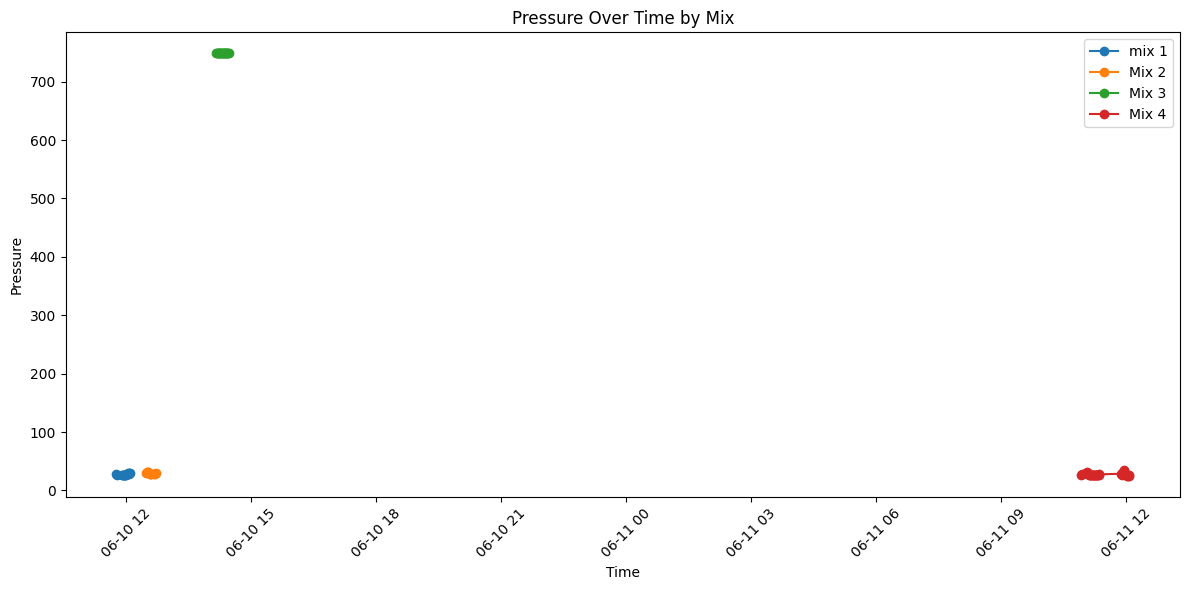

<Figure size 640x480 with 0 Axes>

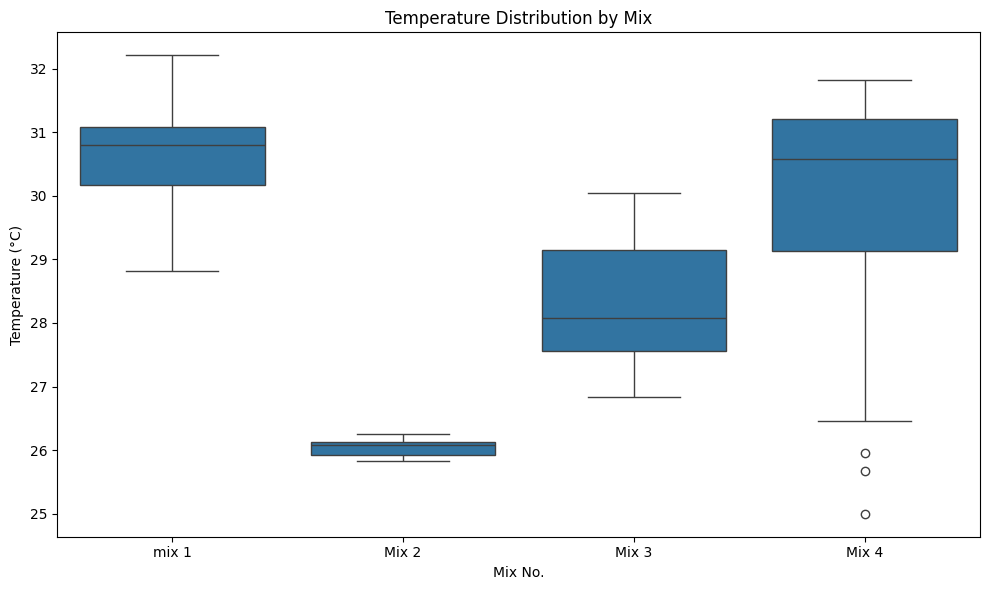

<Figure size 640x480 with 0 Axes>

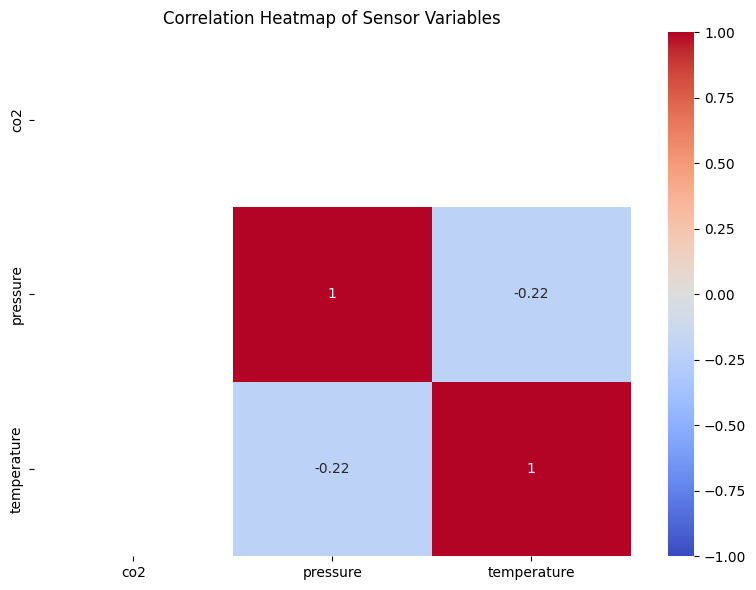


Checking for potential anomalies (e.g., pressure > 100):
High pressure readings detected:
   Mix No. Sample No.         binned_time  pressure
28   Mix 3     Sn 008 2025-06-10 14:10:00    748.28
29   Mix 3     Sn 008 2025-06-10 14:11:00    748.28
30   Mix 3     Sn 008 2025-06-10 14:12:00    748.28
31   Mix 3     Sn 008 2025-06-10 14:13:00    748.28
32   Mix 3     Sn 008 2025-06-10 14:14:00    748.28
33   Mix 3     Sn 008 2025-06-10 14:15:00    748.28
34   Mix 3     Sn 008 2025-06-10 14:16:00    748.28
35   Mix 3     Sn 008 2025-06-10 14:17:00    748.28
36   Mix 3     Sn 008 2025-06-10 14:18:00    748.28
37   Mix 3     Sn 008 2025-06-10 14:19:00    748.28
38   Mix 3     Sn 008 2025-06-10 14:20:00    748.28
39   Mix 3     Sn 008 2025-06-10 14:21:00    748.28
40   Mix 3     Sn 008 2025-06-10 14:22:00    748.28
41   Mix 3     Sn 008 2025-06-10 14:23:00    748.28
42   Mix 3     Sn 008 2025-06-10 14:24:00    748.28
43   Mix 3     Sn 008 2025-06-10 14:25:00    748.28
44   Mix 3     Sn 008 202

<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
categorizeddf = pd.read_excel('ZEN_sensor_data.xlsx', sheet_name='CATEGORIZED')

# 1. Data Cleaning
# Fill forward 'Mix No.' and 'Sample No.' to associate measurements with their respective mixes
categorizeddf['Mix No.'] = categorizeddf['Mix No.'].fillna(method='ffill')
categorizeddf['Sample No.'] = categorizeddf['Sample No.'].fillna(method='ffill')

# Remove rows where all sensor data (co2, pressure, temperature) is NaN
categorizeddf = categorizeddf.dropna(subset=['co2', 'pressure', 'temperature'])

# Convert binned_time to datetime if not already
categorizeddf['binned_time'] = pd.to_datetime(categorizeddf['binned_time'])

# 2. Summary Statistics
print("Summary Statistics for CO2, Pressure, and Temperature:")
print(categorizeddf[['co2', 'pressure', 'temperature']].describe())

# 3. Group by Mix No. to get average sensor readings per mix
mix_summary = categorizeddf.groupby('Mix No.')[['co2', 'pressure', 'temperature']].mean().reset_index()
print("\nAverage Sensor Readings by Mix:")
print(mix_summary)

# 4. Visualizations
# Note: Removed plt.style.use('seaborn') as Seaborn sets its own style

# Plot 1: Time series of pressure for each mix
plt.figure(figsize=(12, 6))
for mix in categorizeddf['Mix No.'].unique():
    mix_data = categorizeddf[categorizeddf['Mix No.'] == mix]
    plt.plot(mix_data['binned_time'], mix_data['pressure'], label=mix, marker='o')
plt.title('Pressure Over Time by Mix')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('pressure_over_time_by_mix.png')

# Plot 2: Boxplot of temperature by mix
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mix No.', y='temperature', data=categorizeddf)
plt.title('Temperature Distribution by Mix')
plt.xlabel('Mix No.')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()
plt.savefig('temperature_distribution_by_mix.png')

# Plot 3: Correlation heatmap of sensor variables
plt.figure(figsize=(8, 6))
correlation_matrix = categorizeddf[['co2', 'pressure', 'temperature']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Sensor Variables')
plt.tight_layout()
plt.show()
plt.savefig('correlation_heatmap.png')

# 5. Check for anomalies (e.g., pressure > 100)
print("\nChecking for potential anomalies (e.g., pressure > 100):")
anomalies = categorizeddf[categorizeddf['pressure'] > 100]
if not anomalies.empty:
    print("High pressure readings detected:")
    print(anomalies[['Mix No.', 'Sample No.', 'binned_time', 'pressure']])
else:
    print("No pressure readings above 100 detected.")

/tmp/ipykernel_411004/3263994860.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  categorizeddf['Mix No.'] = categorizeddf['Mix No.'].fillna(method='ffill')
/tmp/ipykernel_411004/3263994860.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  categorizeddf['Sample No.'] = categorizeddf['Sample No.'].fillna(method='ffill')


Summary Statistics for Pressure and Temperature by Mix:
  Mix No.    pressure                                     temperature  \
                 mean       min         max           std        mean   
0   Mix 2   29.615348   27.7800   31.605000  1.340363e+00   26.033333   
1   Mix 3  748.280000  748.2800  748.280000  4.664394e-13   28.301535   
2   Mix 4   27.722931   25.2525   34.742000  2.104884e+00   29.801042   
3   mix 1   27.660667   26.4200   29.498333  1.070455e+00   30.623611   

                                   
         min        max       std  
0  25.833333  26.250000  0.140929  
1  26.833333  30.041667  1.055838  
2  25.000000  31.812500  1.861256  
3  28.812500  32.208333  0.989104  


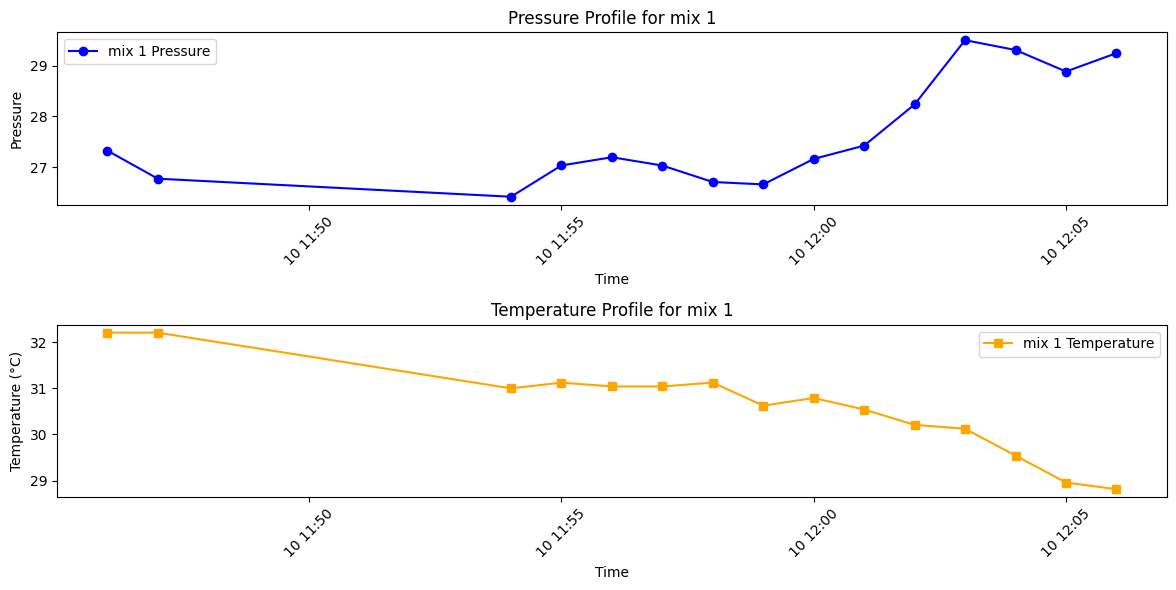

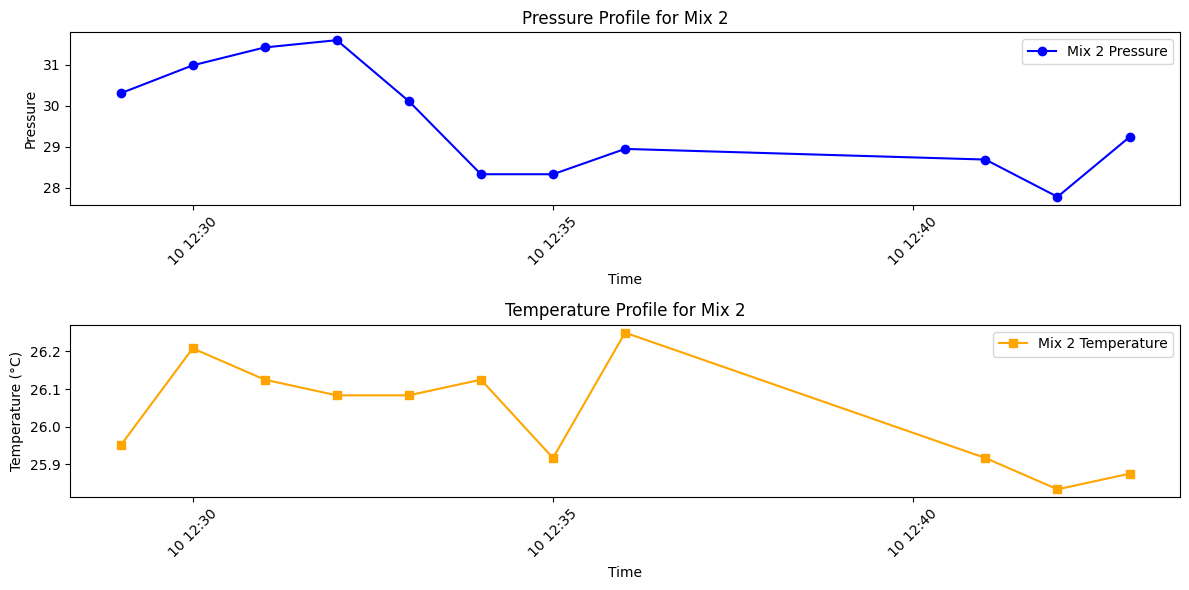

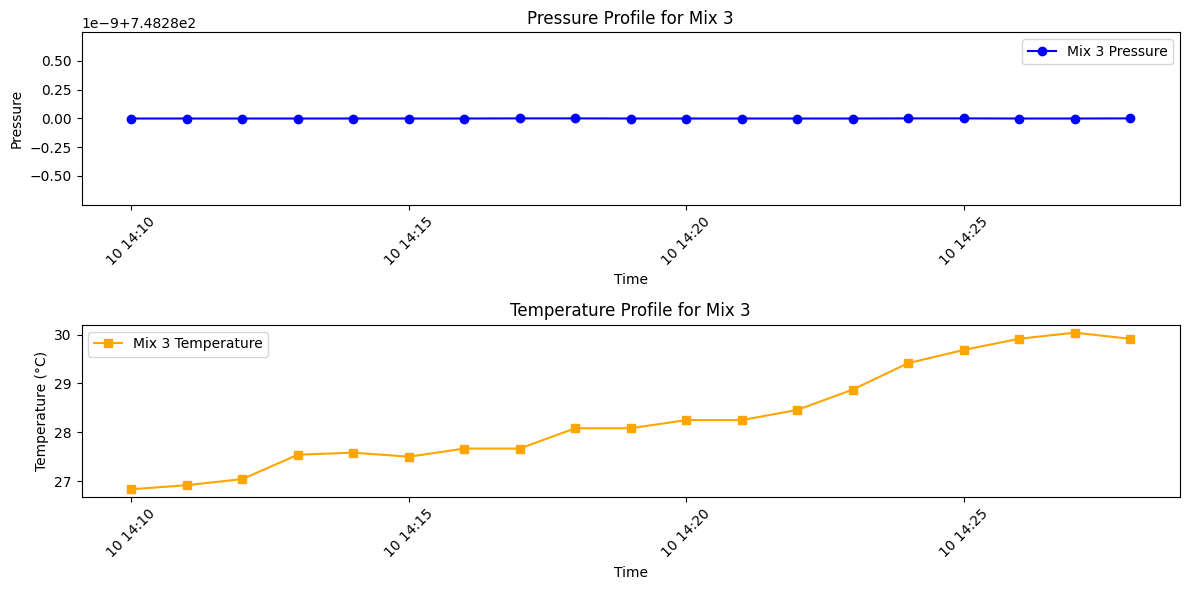

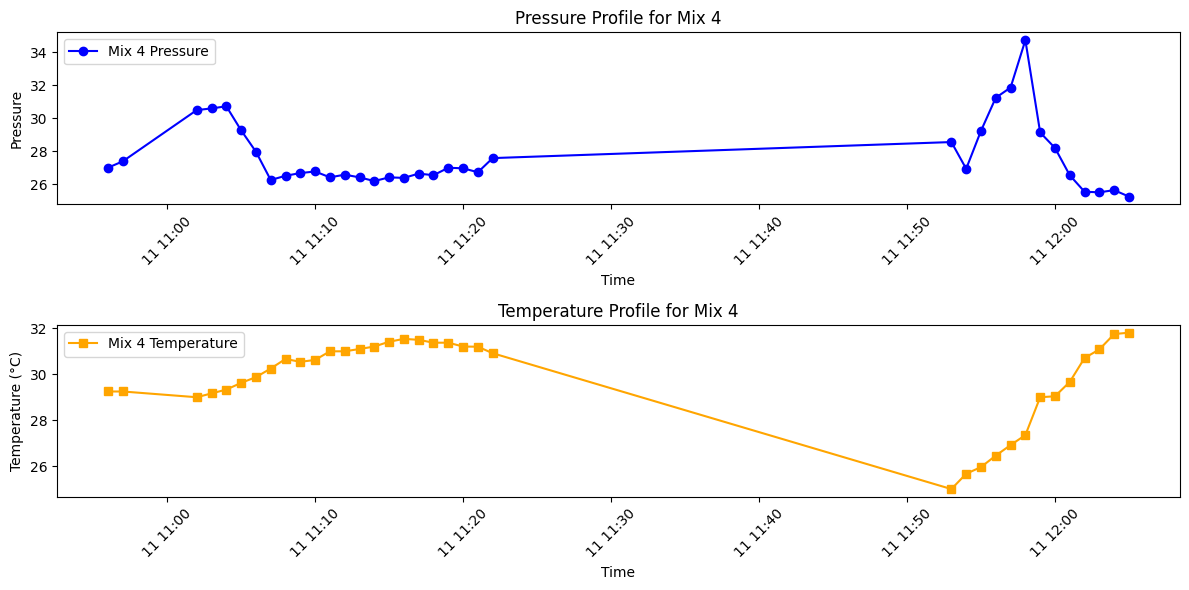

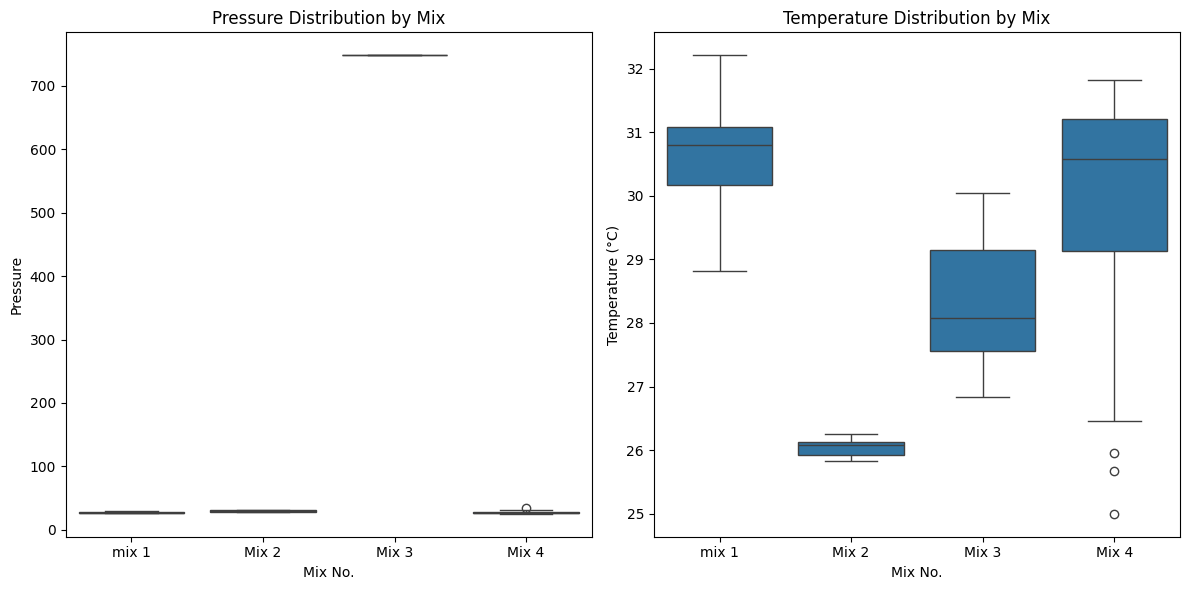


Anomaly Check (Pressure > 100 or Pressure < 0):

No pressure anomalies in mix 1.

No pressure anomalies in Mix 2.

Anomalies in Mix 3:
           binned_time Sample No.  pressure  temperature
28 2025-06-10 14:10:00     Sn 008    748.28    26.833333
29 2025-06-10 14:11:00     Sn 008    748.28    26.916667
30 2025-06-10 14:12:00     Sn 008    748.28    27.041667
31 2025-06-10 14:13:00     Sn 008    748.28    27.541667
32 2025-06-10 14:14:00     Sn 008    748.28    27.583333
33 2025-06-10 14:15:00     Sn 008    748.28    27.500000
34 2025-06-10 14:16:00     Sn 008    748.28    27.666667
35 2025-06-10 14:17:00     Sn 008    748.28    27.666667
36 2025-06-10 14:18:00     Sn 008    748.28    28.083333
37 2025-06-10 14:19:00     Sn 008    748.28    28.083333
38 2025-06-10 14:20:00     Sn 008    748.28    28.250000
39 2025-06-10 14:21:00     Sn 008    748.28    28.250000
40 2025-06-10 14:22:00     Sn 008    748.28    28.458333
41 2025-06-10 14:23:00     Sn 008    748.28    28.875000
42 2025-0

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CATEGORIZED dataset
categorizeddf = pd.read_excel('ZEN_sensor_data.xlsx', sheet_name='CATEGORIZED')

# 1. Data Cleaning
# Fill forward 'Mix No.' and 'Sample No.' to associate measurements with their respective mixes
categorizeddf['Mix No.'] = categorizeddf['Mix No.'].fillna(method='ffill')
categorizeddf['Sample No.'] = categorizeddf['Sample No.'].fillna(method='ffill')

# Remove rows with missing sensor data
categorizeddf = categorizeddf.dropna(subset=['pressure', 'temperature'])

# Ensure binned_time is datetime
categorizeddf['binned_time'] = pd.to_datetime(categorizeddf['binned_time'])

# 2. Summary Statistics by Mix
print("Summary Statistics for Pressure and Temperature by Mix:")
mix_summary = categorizeddf.groupby('Mix No.')[['pressure', 'temperature']].agg(['mean', 'min', 'max', 'std']).reset_index()
print(mix_summary)

# 3. Visualizations
# Time Series Plots for Pressure and Temperature by Mix
mixes = categorizeddf['Mix No.'].unique()

for mix in mixes:
    mix_data = categorizeddf[categorizeddf['Mix No.'] == mix]
    
    plt.figure(figsize=(12, 6))
    
    # Pressure Plot
    plt.subplot(2, 1, 1)
    plt.plot(mix_data['binned_time'], mix_data['pressure'], marker='o', color='blue', label=f'{mix} Pressure')
    plt.title(f'Pressure Profile for {mix}')
    plt.xlabel('Time')
    plt.ylabel('Pressure')
    plt.legend()
    plt.xticks(rotation=45)
    
    # Temperature Plot
    plt.subplot(2, 1, 2)
    plt.plot(mix_data['binned_time'], mix_data['temperature'], marker='s', color='orange', label=f'{mix} Temperature')
    plt.title(f'Temperature Profile for {mix}')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# 4. Boxplots for Pressure and Temperature by Mix
plt.figure(figsize=(12, 6))

# Pressure Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Mix No.', y='pressure', data=categorizeddf)
plt.title('Pressure Distribution by Mix')
plt.xlabel('Mix No.')
plt.ylabel('Pressure')

# Temperature Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='Mix No.', y='temperature', data=categorizeddf)
plt.title('Temperature Distribution by Mix')
plt.xlabel('Mix No.')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()

# 5. Anomaly Detection for Each Mix
print("\nAnomaly Check (Pressure > 100 or Pressure < 0):")
for mix in mixes:
    mix_data = categorizeddf[categorizeddf['Mix No.'] == mix]
    anomalies = mix_data[(mix_data['pressure'] > 100) | (mix_data['pressure'] < 0)]
    if not anomalies.empty:
        print(f"\nAnomalies in {mix}:")
        print(anomalies[['binned_time', 'Sample No.', 'pressure', 'temperature']])
    else:
        print(f"\nNo pressure anomalies in {mix}.")

In [4]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import plotly.io as pio

# Verify environment and dependencies
try:
    import nbformat
    print("nbformat is installed:", nbformat.__version__)
except ImportError:
    print("Error: nbformat is not installed. Please run 'pip install nbformat'.")
    exit(1)

# Set Plotly renderer to ensure compatibility
pio.renderers.default = 'jupyterlab'  # Try 'notebook' or 'browser' if 'jupyterlab' fails

# Verify file exists
file_path = 'ZEN_sensor_data.xlsx'
if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found in current directory: {os.getcwd()}")
    exit(1)

# Load the RAW DATA dataset
try:
    rawdatadf = pd.read_excel(file_path, sheet_name='RAW DATA')
except Exception as e:
    print(f"Error loading Excel file: {e}")
    exit(1)

# 1. Data Cleaning
# Ensure binned_time is datetime
try:
    rawdatadf['binned_time'] = pd.to_datetime(rawdatadf['binned_time'])
except Exception as e:
    print(f"Error converting binned_time to datetime: {e}")
    exit(1)

# Remove rows with missing sensor data
rawdatadf = rawdatadf.dropna(subset=['pressure', 'temperature'])

# 2. Create Interactive Time Series Plot
# Create a subplot with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Pressure trace
fig.add_trace(
    go.Scatter(
        x=rawdatadf['binned_time'],
        y=rawdatadf['pressure'],
        name='Pressure',
        line=dict(color='blue'),
        mode='lines+markers',
        marker=dict(size=4)
    ),
    secondary_y=False
)

# Add Temperature trace
fig.add_trace(
    go.Scatter(
        x=rawdatadf['binned_time'],
        y=rawdatadf['temperature'],
        name='Temperature (°C)',
        line=dict(color='orange'),
        mode='lines+markers',
        marker=dict(size=4)
    ),
    secondary_y=True
)

# Add CO2 trace (on same axis as temperature)
fig.add_trace(
    go.Scatter(
        x=rawdatadf['binned_time'],
        y=rawdatadf['co2'],
        name='CO2',
        line=dict(color='green', dash='dash'),
        mode='lines+markers',
        marker=dict(size=4)
    ),
    secondary_y=True
)

# Update layout for interactivity with specified axis ranges
fig.update_layout(
    title='Interactive Time Series of Raw Data (Pressure, Temperature, CO2)',
    xaxis_title='Time',
    yaxis_title='Pressure',
    yaxis2_title='Temperature (°C) / CO2',
    hovermode='x unified',
    dragmode='zoom',
    xaxis=dict(
        rangeslider=dict(visible=True),  # Scrollable range slider
        type='date',
        tickformat='%Y-%m-%d %H:%M:%S'
    ),
    yaxis=dict(
        range=[10, 40],  # Set pressure range from 10 to 40
        title='Pressure'
    ),
    yaxis2=dict(
        range=[15, 40],  # Set temperature range from 15°C to 40°C
        title='Temperature (°C) / CO2'
    ),
    showlegend=True,
    template='plotly'
)

# Enable zoom and pan
fig.update_xaxes(
    showspikes=True,
    spikecolor="black",
    spikethickness=1,
    spikedash="dot",
    spikemode="across"
)

# Show the plot
try:
    fig.show()
    print("Interactive plot displayed successfully.")
except Exception as e:
    print(f"Error displaying plot: {e}")
    print("Falling back to HTML output.")

# Save as HTML for standalone viewing
try:
    fig.write_html('raw_data_timeseries.html')
    print("Interactive plot saved as 'raw_data_timeseries.html' in", os.getcwd())
except Exception as e:
    print(f"Error saving HTML file: {e}")

nbformat is installed: 5.10.4


Interactive plot displayed successfully.
Interactive plot saved as 'raw_data_timeseries.html' in /home/davis/Desktop/ZENdata


In [9]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import plotly.io as pio
import json

# Verify environment and dependencies
try:
    import nbformat
    print("nbformat is installed:", nbformat.__version__)
except ImportError:
    print("Error: nbformat is not installed. Please run 'pip install nbformat'.")
    exit(1)

# Set Plotly renderer to ensure compatibility
pio.renderers.default = 'jupyterlab'  # Try 'notebook' or 'browser' if 'jupyterlab' fails

# Verify file exists
file_path = 'ZEN_sensor_data.xlsx'
if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found in current directory: {os.getcwd()}")
    exit(1)

# Load the RAW DATA dataset
try:
    rawdatadf = pd.read_excel(file_path, sheet_name='RAW DATA')
except Exception as e:
    print(f"Error loading Excel file: {e}")
    exit(1)

# 1. Data Cleaning
# Ensure binned_time is datetime
try:
    rawdatadf['binned_time'] = pd.to_datetime(rawdatadf['binned_time'])
except Exception as e:
    print(f"Error converting binned_time to datetime: {e}")
    exit(1)

# Remove rows with missing sensor data
rawdatadf = rawdatadf.dropna(subset=['pressure', 'temperature'])

# 2. Create Interactive Time Series Plot with Two Subplots
# Create subplots: top for main data (fine adjustment), bottom for overview (coarse adjustment)
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.8, 0.2],
    specs=[[{"secondary_y": True}], [{"secondary_y": False}]],
    vertical_spacing=0.05
)

# Add Pressure trace to main plot (top)
fig.add_trace(
    go.Scatter(
        x=rawdatadf['binned_time'],
        y=rawdatadf['pressure'],
        name='Pressure',
        line=dict(color='blue'),
        mode='lines+markers',
        marker=dict(size=4)
    ),
    row=1, col=1, secondary_y=False
)

# Add Temperature trace to main plot
fig.add_trace(
    go.Scatter(
        x=rawdatadf['binned_time'],
        y=rawdatadf['temperature'],
        name='Temperature (°C)',
        line=dict(color='orange'),
        mode='lines+markers',
        marker=dict(size=4)
    ),
    row=1, col=1, secondary_y=True
)

# Add CO2 trace to main plot
fig.add_trace(
    go.Scatter(
        x=rawdatadf['binned_time'],
        y=rawdatadf['co2'],
        name='CO2',
        line=dict(color='green', dash='dash'),
        mode='lines+markers',
        marker=dict(size=4)
    ),
    row=1, col=1, secondary_y=True
)

# Add Pressure trace to overview plot (bottom) for coarse adjustment
fig.add_trace(
    go.Scatter(
        x=rawdatadf['binned_time'],
        y=rawdatadf['pressure'],
        name='Pressure (Overview)',
        line=dict(color='blue'),
        mode='lines',
        showlegend=False
    ),
    row=2, col=1, secondary_y=False
)

# Update layout for interactivity
fig.update_layout(
    title='Interactive Time Series with Coarse and Fine Adjustment Sliders',
    hovermode='x unified',
    dragmode='zoom',
    showlegend=True,
    template='plotly',
    height=800
)

# Configure x-axes and y-axes
fig.update_xaxes(
    title_text='Time',
    rangeslider=dict(visible=True, thickness=0.1),  # Fine adjustment slider in main plot
    type='date',
    tickformat='%Y-%m-%d %H:%M:%S',
    showspikes=True,
    spikecolor="black",
    spikethickness=1,
    spikedash="dot",
    spikemode="across",
    row=1, col=1
)

fig.update_xaxes(
    title_text='Coarse Adjustment',
    rangeslider=dict(visible=True, thickness=0.15),  # Coarse adjustment slider in overview plot
    type='date',
    tickformat='%Y-%m-%d',
    row=2, col=1
)

fig.update_yaxes(
    title_text='Pressure',
    range=[10, 40],  # Pressure range
    row=1, col=1, secondary_y=False
)

fig.update_yaxes(
    title_text='Temperature (°C) / CO2',
    range=[15, 40],  # Temperature range
    row=1, col=1, secondary_y=True
)

fig.update_yaxes(
    title_text='Pressure (Overview)',
    range=[10, 40],
    showgrid=False,
    row=2, col=1
)

# Add reset button
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"xaxis.range": [None, None], "xaxis2.range": [None, None]}],
                    label="Reset",
                    method="relayout"
                )
            ]),
            direction="down",
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ]
)

# Add JavaScript for coarse slider to update main plot
script = """
<script>
    var plot = document.getElementsByClassName('plotly')[0];
    plot.on('plotly_relayout', function(eventdata) {
        if (eventdata['xaxis2.range[0]'] && eventdata['xaxis2.range[1]']) {
            var coarseStart = eventdata['xaxis2.range[0]'];
            var coarseEnd = eventdata['xaxis2.range[1]'];
            Plotly.relayout(plot, {
                'xaxis.range[0]': coarseStart,
                'xaxis.range[1]': coarseEnd
            });
        }
    });
</script>
"""

# Save as HTML with embedded JavaScript
try:
    html_content = fig.to_html(full_html=True, include_plotlyjs='cdn')
    html_content = html_content.replace('</body>', script + '</body>')
    with open('raw_data_timeseries.html', 'w') as f:
        f.write(html_content)
    print("Interactive plot with coarse and fine sliders saved as 'raw_data_timeseries.html' in", os.getcwd())
except Exception as e:
    print(f"Error saving HTML file: {e}")

# Attempt to display in Jupyter
try:
    fig.show()
    print("Interactive plot displayed successfully (coarse slider updates may require HTML output).")
except Exception as e:
    print(f"Error displaying plot: {e}")
    print("Please open 'raw_data_timeseries.html' in a browser for full interactivity.")

nbformat is installed: 5.10.4
Interactive plot with coarse and fine sliders saved as 'raw_data_timeseries.html' in /home/davis/Desktop/ZENdata


Interactive plot displayed successfully (coarse slider updates may require HTML output).


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import webbrowser
import plotly.io as pio

# Verify dependencies
try:
    import nbformat
    print("nbformat is installed:", nbformat.__version__)
except ImportError:
    print("Error: nbformat is not installed. Please run 'pip install nbformat'.")
    exit(1)

# Set Plotly renderer to browser for standalone HTML
pio.renderers.default = 'browser'

# Verify file exists
file_path = 'ZEN_sensor_data.xlsx'
if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found in current directory: {os.getcwd()}")
    exit(1)

# Load the RAW DATA dataset
try:
    rawdatadf = pd.read_excel(file_path, sheet_name='RAW DATA')
except Exception as e:
    print(f"Error loading Excel file: {e}")
    exit(1)

# 1. Data Cleaning
# Ensure binned_time is datetime
try:
    rawdatadf['binned_time'] = pd.to_datetime(rawdatadf['binned_time'])
except Exception as e:
    print(f"Error converting binned_time to datetime: {e}")
    exit(1)

# Remove rows with missing sensor data
rawdatadf = rawdatadf.dropna(subset=['pressure', 'temperature'])

# 2. Create Interactive Time Series Plot
# Create a subplot with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Pressure trace
fig.add_trace(
    go.Scatter(
        x=rawdatadf['binned_time'],
        y=rawdatadf['pressure'],
        name='Pressure',
        line=dict(color='blue'),
        mode='lines+markers',
        marker=dict(size=4)
    ),
    secondary_y=False
)

# Add Temperature trace
fig.add_trace(
    go.Scatter(
        x=rawdatadf['binned_time'],
        y=rawdatadf['temperature'],
        name='Temperature (°C)',
        line=dict(color='orange'),
        mode='lines+markers',
        marker=dict(size=4)
    ),
    secondary_y=True
)

# Add CO2 trace
fig.add_trace(
    go.Scatter(
        x=rawdatadf['binned_time'],
        y=rawdatadf['co2'],
        name='CO2',
        line=dict(color='green', dash='dash'),
        mode='lines+markers',
        marker=dict(size=4)
    ),
    secondary_y=True
)

# Configure adjustable axis tick intervals (customize these as needed)
pressure_tick_interval = 10  # Pressure axis: 1 unit = 10 (adjust as needed)
temperature_tick_interval = 1  # Temperature/CO2 axis: 1 unit = 1°C (adjust as needed)
time_tick_interval = 'M1'  # Time axis: 1-minute ticks (options: 'D1' for days, 'H1' for hours, etc.)

# Update layout for interactivity and toggle buttons
fig.update_layout(
    title='Interactive Time Series of Raw Data (Pressure, Temperature, CO2)',
    xaxis_title='Time',
    yaxis_title='Pressure',
    yaxis2_title='Temperature (°C) / CO2',
    hovermode='x unified',
    dragmode='zoom',
    xaxis=dict(
        rangeslider=dict(visible=True),  # Scrollable range slider
        type='date',
        tickformat='%Y-%m-%d %H:%M:%S',
        dtick=1000 * 60 * 60 * 24 * 30 if time_tick_interval == 'M1' else 1000 * 60 * 60 * 24  # Convert to milliseconds
    ),
    yaxis=dict(
        dtick=pressure_tick_interval
    ),
    yaxis2=dict(
        dtick=temperature_tick_interval
    ),
    showlegend=True,
    template='plotly',
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.05,
            y=1.15,
            buttons=list([
                dict(
                    label="Show All",
                    method="update",
                    args=[{"visible": [True, True, True]},
                          {"title": "Interactive Time Series (All Variables)"}]
                ),
                dict(
                    label="Pressure Only",
                    method="update",
                    args=[{"visible": [True, False, False]},
                          {"title": "Interactive Time Series (Pressure Only)"}]
                ),
                dict(
                    label="Temperature Only",
                    method="update",
                    args=[{"visible": [False, True, False]},
                          {"title": "Interactive Time Series (Temperature Only)"}]
                ),
                dict(
                    label="CO2 Only",
                    method="update",
                    args=[{"visible": [False, False, True]},
                          {"title": "Interactive Time Series (CO2 Only)"}]
                )
            ])
        )
    ]
)

# Enable zoom and pan
fig.update_xaxes(
    showspikes=True,
    spikecolor="black",
    spikethickness=1,
    spikedash="dot",
    spikemode="across"
)

# Save as HTML and open in browser
html_file = 'raw_data_timeseries.html'
try:
    fig.write_html(html_file)
    print(f"Interactive plot saved as '{html_file}' in {os.getcwd()}")
    # Open the HTML file in the default browser
    webbrowser.open('file://' + os.path.realpath(html_file))
    print("Plot opened in default browser.")
except Exception as e:
    print(f"Error saving or opening HTML file: {e}")

# Optionally display in Jupyter (if running in a notebook)
try:
    fig.show()
    print("Interactive plot displayed in Jupyter (if applicable).")
except Exception as e:
    print(f"Error displaying plot in Jupyter: {e}")

nbformat is installed: 5.10.4
Interactive plot saved as 'raw_data_timeseries.html' in /home/davis/Desktop/ZENdata
Plot opened in default browser.


In [5]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import webbrowser
import plotly.io as pio

# Verify dependencies
try:
    import nbformat
    print("nbformat is installed:", nbformat.__version__)
except ImportError:
    print("Error: nbformat is not installed. Please run 'pip install nbformat'.")
    exit(1)

# Set Plotly renderer to browser
pio.renderers.default = 'browser'

# Verify file exists
file_path = 'ZEN_sensor_data.xlsx'
if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found in current directory: {os.getcwd()}")
    exit(1)

# Load the RAW DATA dataset
try:
    rawdatadf = pd.read_excel(file_path, sheet_name='RAW DATA')
except Exception as e:
    print(f"Error loading Excel file: {e}")
    exit(1)

# 1. Data Cleaning
# Ensure binned_time is datetime
try:
    rawdatadf['binned_time'] = pd.to_datetime(rawdatadf['binned_time'])
except Exception as e:
    print(f"Error converting binned_time to datetime: {e}")
    exit(1)

# Remove rows with missing sensor data
rawdatadf = rawdatadf.dropna(subset=['pressure', 'temperature'])

# 2. Create Interactive Time Series Plot
# Create a subplot with two y-axes (used only for Show All)
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Pressure trace
fig.add_trace(
    go.Scatter(
        x=rawdatadf['binned_time'],
        y=rawdatadf['pressure'],
        name='Pressure',
        line=dict(color='blue'),
        mode='lines+markers',
        marker=dict(size=4)
    ),
    secondary_y=False
)

# Add Temperature trace
fig.add_trace(
    go.Scatter(
        x=rawdatadf['binned_time'],
        y=rawdatadf['temperature'],
        name='Temperature (°C)',
        line=dict(color='orange'),
        mode='lines+markers',
        marker=dict(size=4)
    ),
    secondary_y=True
)

# Add CO2 trace
fig.add_trace(
    go.Scatter(
        x=rawdatadf['binned_time'],
        y=rawdatadf['co2'],
        name='CO2',
        line=dict(color='green', dash='dash'),
        mode='lines+markers',
        marker=dict(size=4)
    ),
    secondary_y=True
)

# Configure adjustable axis tick intervals (customize these as needed)
pressure_tick_interval = 10  # Pressure axis tick interval (e.g., 10 units)
temperature_tick_interval = 1  # Temperature axis tick interval (e.g., 1°C)
co2_tick_interval = 1  # CO2 axis tick interval (e.g., 1 unit)
time_tick_interval = 'M1'  # Time axis: 1-minute ticks (options: 'D1' for days, 'H1' for hours)

# Update layout for interactivity and toggle buttons
fig.update_layout(
    title='Interactive Time Series of Raw Data',
    xaxis_title='Time',
    yaxis_title='Pressure',
    yaxis2_title='Temperature (°C) / CO2',
    hovermode='x unified',
    dragmode='zoom',
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='date',
        tickformat='%Y-%m-%d %H:%M:%S',
        dtick=1000 * 60 * 60 * 24 * 30 if time_tick_interval == 'M1' else 1000 * 60 * 60 * 24
    ),
    yaxis=dict(
        dtick=pressure_tick_interval,
        title='Pressure'
    ),
    yaxis2=dict(
        dtick=temperature_tick_interval,
        title='Temperature (°C) / CO2'
    ),
    showlegend=True,
    template='plotly',
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.05,
            y=1.15,
            buttons=list([
                dict(
                    label="Show All",
                    method="update",
                    args=[{
                        "visible": [True, True, True],
                        "yaxis.title.text": "Pressure",
                        "yaxis.dtick": pressure_tick_interval,
                        "yaxis2.title.text": "Temperature (°C) / CO2",
                        "yaxis2.dtick": temperature_tick_interval,
                        "yaxis2.showticklabels": True
                    },
                    {
                        "title": "Interactive Time Series (All Variables)",
                        "yaxis.visible": True,
                        "yaxis2.visible": True
                    }]
                ),
                dict(
                    label="Pressure Only",
                    method="update",
                    args=[{
                        "visible": [True, False, False],
                        "yaxis.title.text": "Pressure",
                        "yaxis.dtick": pressure_tick_interval,
                        "yaxis2.title.text": "",
                        "yaxis2.dtick": None,
                        "yaxis2.showticklabels": False
                    },
                    {
                        "title": "Interactive Time Series (Pressure Only)",
                        "yaxis.visible": True,
                        "yaxis2.visible": False
                    }]
                ),
                dict(
                    label="Temperature Only",
                    method="update",
                    args=[{
                        "visible": [False, True, False],
                        "yaxis.title.text": "Temperature (°C)",
                        "yaxis.dtick": temperature_tick_interval,
                        "yaxis2.title.text": "",
                        "yaxis2.dtick": None,
                        "yaxis2.showticklabels": False
                    },
                    {
                        "title": "Interactive Time Series (Temperature Only)",
                        "yaxis.visible": True,
                        "yaxis2.visible": False
                    }]
                ),
                dict(
                    label="CO2 Only",
                    method="update",
                    args=[{
                        "visible": [False, False, True],
                        "yaxis.title.text": "CO2",
                        "yaxis.dtick": co2_tick_interval,
                        "yaxis2.title.text": "",
                        "yaxis2.dtick": None,
                        "yaxis2.showticklabels": False
                    },
                    {
                        "title": "Interactive Time Series (CO2 Only)",
                        "yaxis.visible": True,
                        "yaxis2.visible": False
                    }]
                )
            ])
        )
    ]
)

# Enable zoom and pan
fig.update_xaxes(
    showspikes=True,
    spikecolor="black",
    spikethickness=1,
    spikedash="dot",
    spikemode="across"
)

# Save as HTML and open in browser
html_file = 'raw_data_timeseries.html'
try:
    fig.write_html(html_file)
    print(f"Interactive plot saved as '{html_file}' in {os.getcwd()}")
    webbrowser.open('file://' + os.path.realpath(html_file))
    print("Plot opened in default browser.")
except Exception as e:
    print(f"Error saving or opening HTML file: {e}")

# Optionally display in Jupyter
try:
    fig.show()
    print("Interactive plot displayed in Jupyter (if applicable).")
except Exception as e:
    print(f"Error displaying plot in Jupyter: {e}")

nbformat is installed: 5.10.4
Interactive plot saved as 'raw_data_timeseries.html' in /home/davis/Desktop/ZENdata
Plot opened in default browser.
Interactive plot displayed in Jupyter (if applicable).
